In [16]:
#
# A notebook to unreconstruct paleotopographies from previously published work
#

import pygplates
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../../passive_margins')
sys.path.append('../../atom_utils')
sys.path.append('../../GPlatesReconstructionModel/')

from pigplates import sphere_tools as pigsph
from reconstruct_atom_rasters import *

import ptt.utils.call_system_command as call_system_command


%matplotlib inline
%load_ext autoreload
%autoreload 2

from raster_reconstruction_classes import *
from reconstruction_classes import *

rotation_filename = '/Users/Simon/Data/GPlates/PublishedModels/Scotese_PaleoAtlas/PALEOMAP_Global_Plate_Model/PALEOMAP_PlateModel.rot'
static_polygon_filename = '/Users/Simon/Data/GPlates/PublishedModels/Scotese_PaleoAtlas/PALEOMAP_Global_Plate_Model/PALEOMAP_PlatePolygons.gpml'


PALEOMAP = ReconstructionModel('PALEOMAP')
PALEOMAP.add_rotation_model(rotation_filename)
PALEOMAP.add_static_polygons(static_polygon_filename)


# Loop over each image in the PALEOMAP data set
# First, get list of all image files in directory
file_list = glob.glob('/Users/Simon/Data/GPlates/PublishedModels/Scotese_PaleoAtlas/PaleoDEMS_netcdf/*_1deg.nc')

time_list = []
for file_name in file_list:
    time_list.append(file_name.split('_')[-2][:-2])

for file_name in file_list:
    tmp = file_name.split('_')[-2][:-2]
    #call_system_command(['cp',file_name, '%s%s' % (tmp[0], tmp[1])])
    call_system_command(['cp',
                         file_name,
                         '/Users/Simon/Data/GPlates/PublishedModels/Scotese_PaleoAtlas/PaleoDEMS_netcdf/PalaoDEM_%sMa.nc' % tmp])



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# This step is necessary because the PALEOMAP polygons include some 'invalid geometries' (e.g. polylines, and polygons with 2 points)
# So we need to clean these up, and ignore oceanic polygons that are only valid at present day
sp = []
youngest_polygon_to_take = 100.

for polygon in pygplates.FeatureCollection(static_polygon_filename):
    for geometry in polygon.get_all_geometries():
        if type(geometry)!=pygplates.PolylineOnSphere:
            if polygon.get_valid_time()[0]>youngest_polygon_to_take:
                sp.append(polygon)


def xyz2grd(filename,lons,lats,zvals,grid_sampling):
    
    write_xyz_file('_tmp.xyz', zip(lons, lats, zvals))
    
    call_system_command(['gmt','xyz2grd','_tmp.xyz','-G%s' % filename, '-Rd', '-I%0.5f' % grid_sampling])
    
    

grid_sampling=0.5
plotting = False
        
for filename,reconstruction_time in zip(file_list,time_list):
    
    print reconstruction_time
    
    ptopo = GplatesRaster(filename)

    from_time = np.float(reconstruction_time)
    to_time = 0.

    (unreconstructed_point_lons,
     unreconstructed_point_lats,
     topography_points) = reconstruct_raster(ptopo, sp, PALEOMAP.rotation_model,
                                             from_time, to_time, 
                                             grid_sampling=grid_sampling)

    
    if plotting:
        plt.figure(figsize=(20,9))
        plt.scatter(unreconstructed_point_lons,unreconstructed_point_lats,
                    c=topography_points,s=12,vmin=-3000,vmax=3000)
        plt.colorbar()
        plt.savefig('./images/UnreconstructedPaleoDEM_%sMa.png' % reconstruction_time)
        #plt.show()
        plt.close()
        
    else:
        xyz2grd('./grids/UnreconstructedPaleoDEM_%sMa.nc' % reconstruction_time,
                unreconstructed_point_lons,
                unreconstructed_point_lats,
                topography_points,
                grid_sampling)


217.8
Reconstruct static polygons...
Find static polygons...
Group by polygons...
Reverse reconstruct points...
Sample present-day grid...
455.7
Reconstruct static polygons...
Find static polygons...
Group by polygons...
Reverse reconstruct points...
Sample present-day grid...
354
Reconstruct static polygons...
Find static polygons...
Group by polygons...
Reverse reconstruct points...
Sample present-day grid...
465
Reconstruct static polygons...
Find static polygons...
Group by polygons...
Reverse reconstruct points...
Sample present-day grid...
115.8
Reconstruct static polygons...
Find static polygons...
Group by polygons...
Reverse reconstruct points...
Sample present-day grid...
14.9
Reconstruct static polygons...
Find static polygons...
Group by polygons...
Reverse reconstruct points...
Sample present-day grid...
460
Reconstruct static polygons...
Find static polygons...
Group by polygons...
Reverse reconstruct points...
Sample present-day grid...
60.6
Reconstruct static polygons..

[ 91  22  65  47  88  12  57  49  16  68  99  61  21  64  23  86  48  81
  97  98  27  36   6  56   9  82  10 101  32  80   2  69  33  38 106  76
  66  51   0  19   3  20  37 105  75  73  14  94  93 102  87  34  95  84
   7  96  58  18  74  31  77   5  63  39  50  85 103  40  92  52  62 107
  42  44   1  28  24 104 108  13  45  67   4  41  54  29  90  89  43  70
  55  71   8  15  46  59  26  25  83  78  79  72  60  53 100  35  17  11
  30]
535


/opt/anaconda3/envs/oldmate/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less


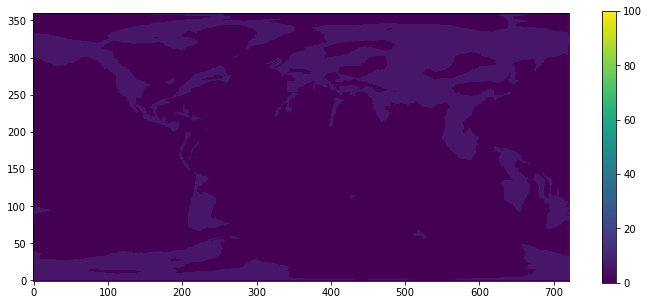

530


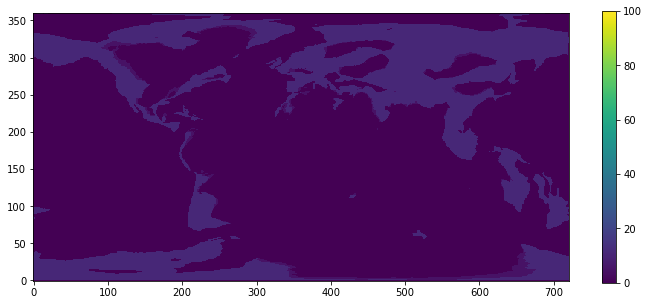

525


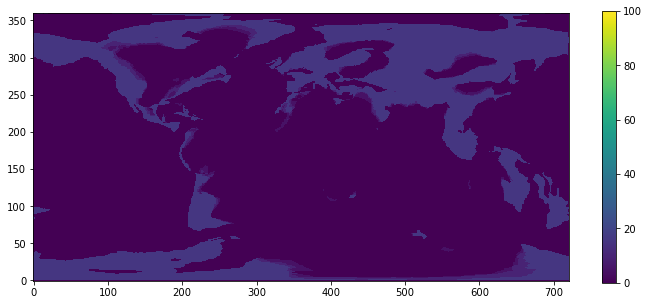

520


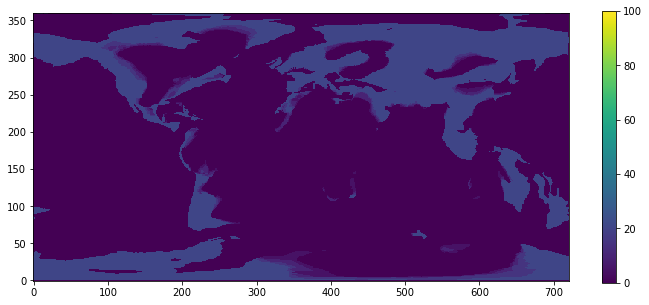

515


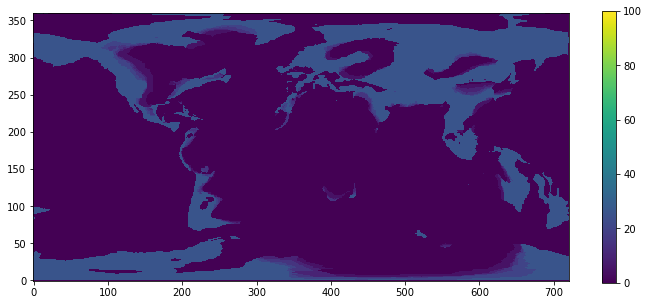

510


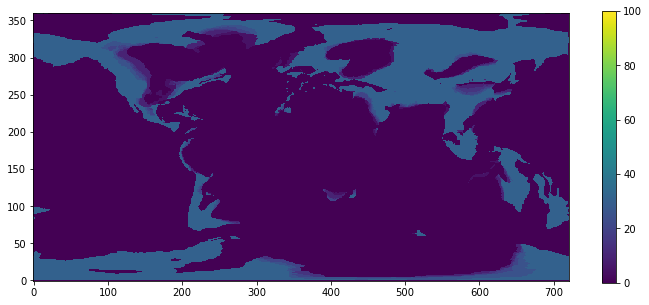

505


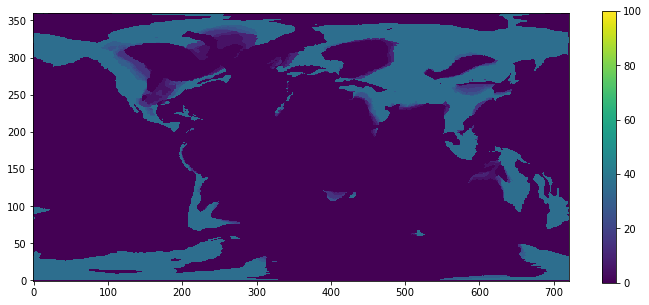

498.8


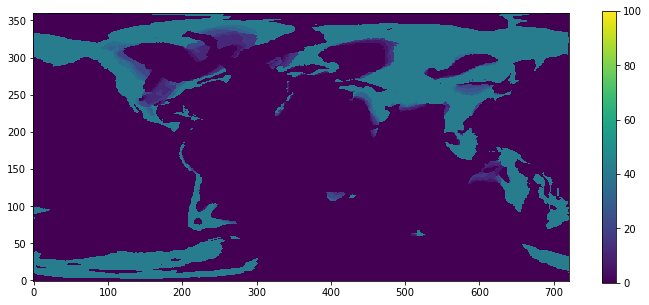

495.5


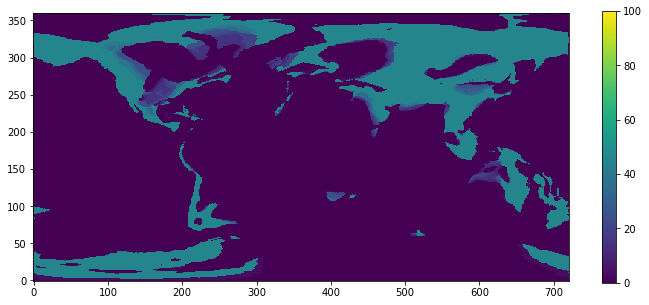

491.8


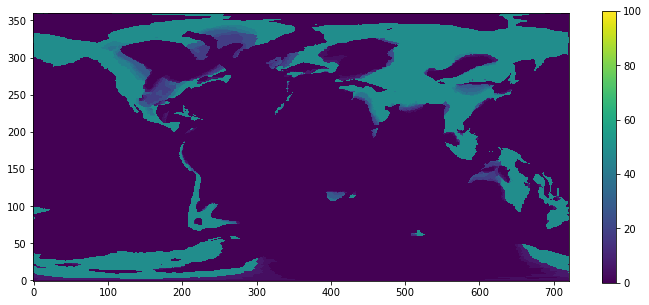

485.4


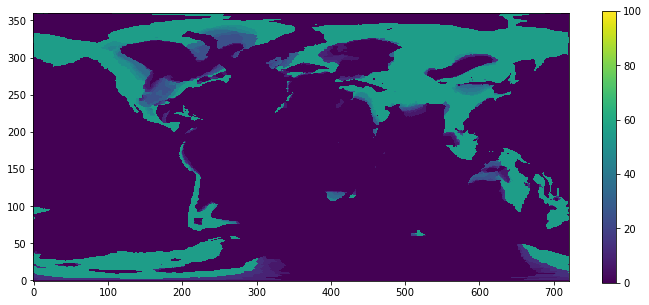

481.6


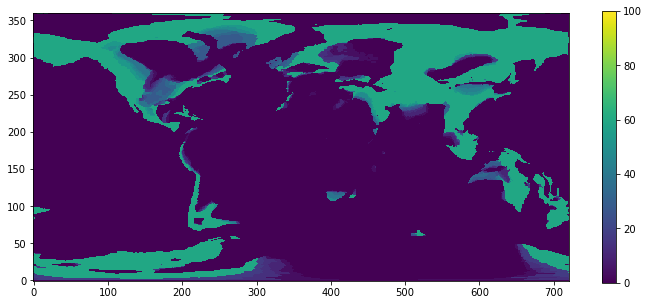

475


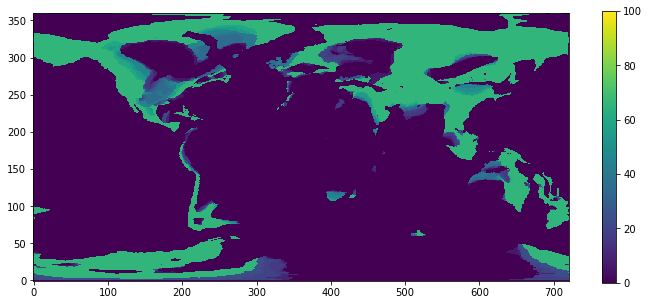

470


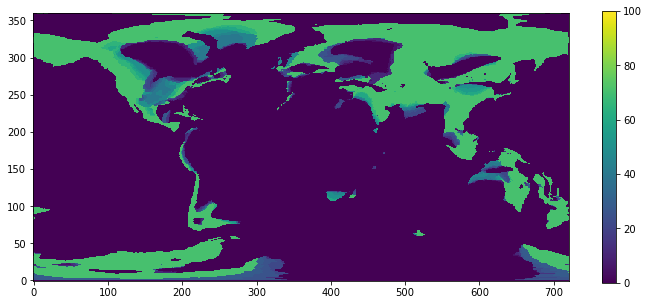

465


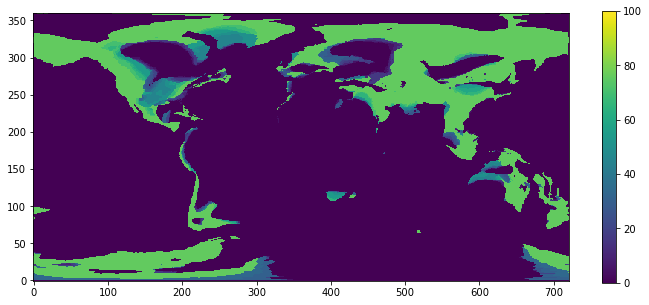

460


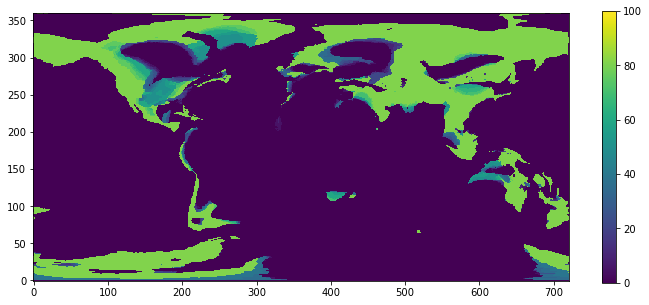

455.7


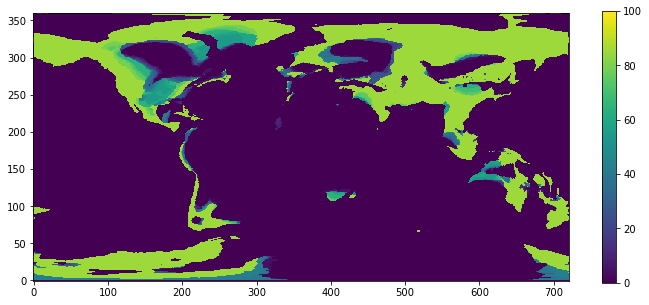

449.1


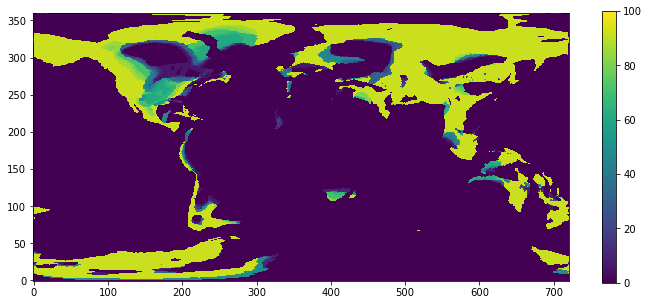

444.5


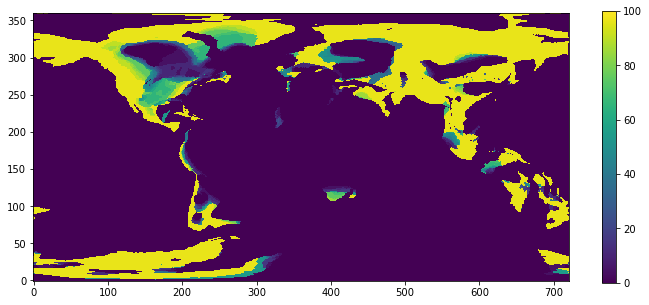

441.2


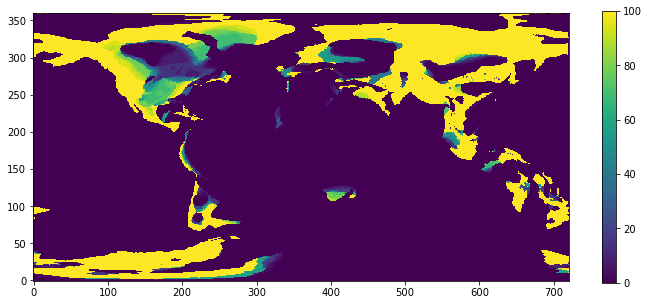

436


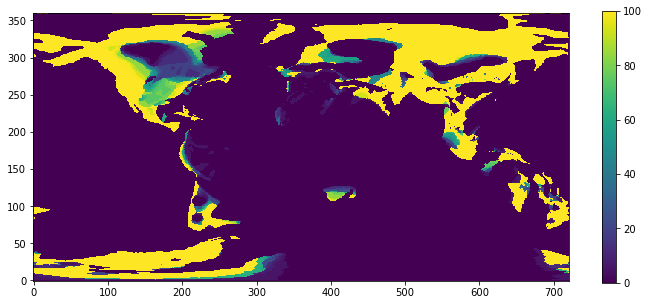

430.4


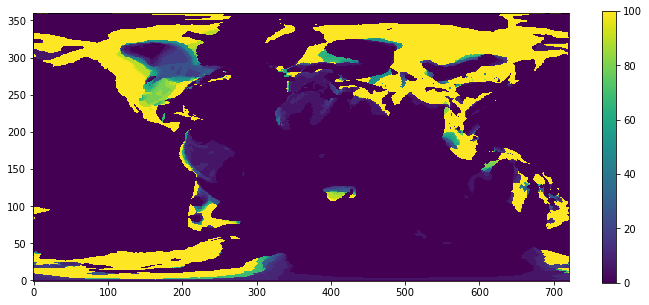

425.2


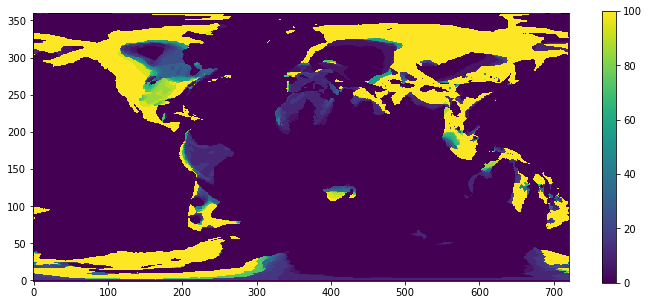

421.1


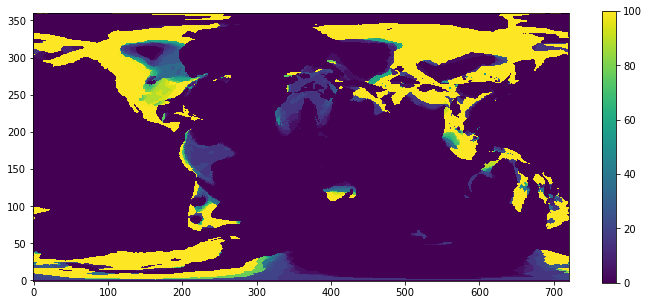

415


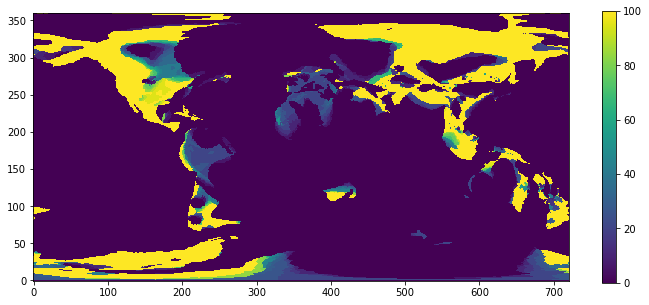

410


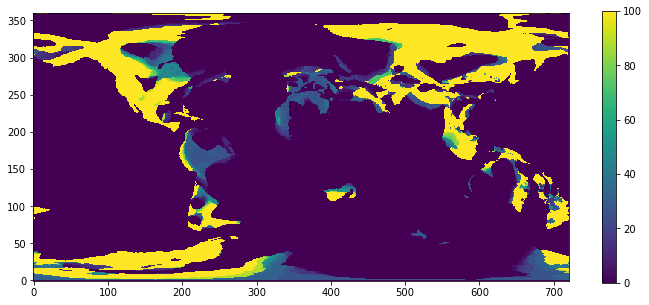

405


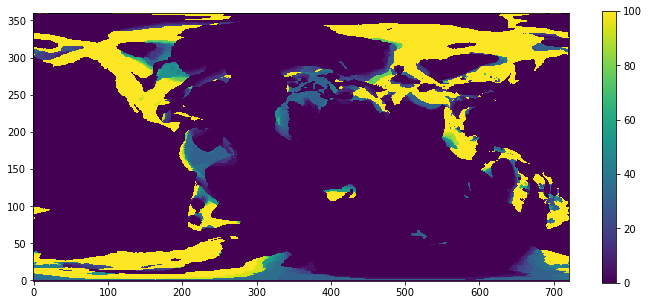

400


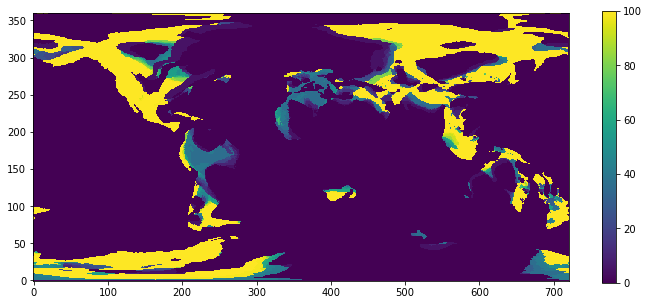

395


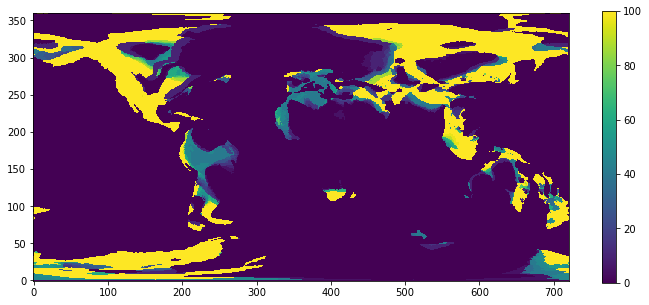

390.5


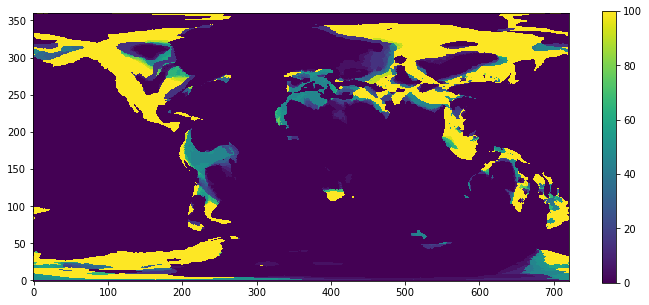

385.2


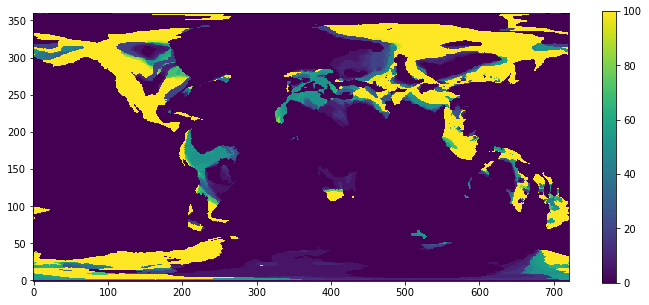

380


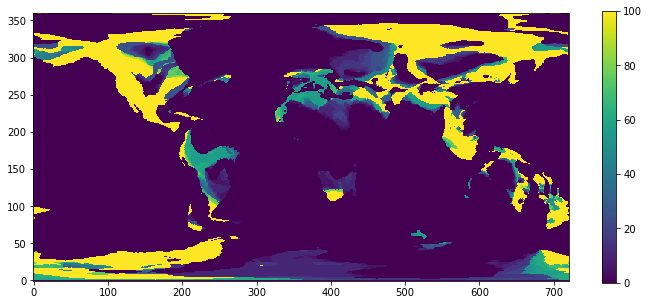

375


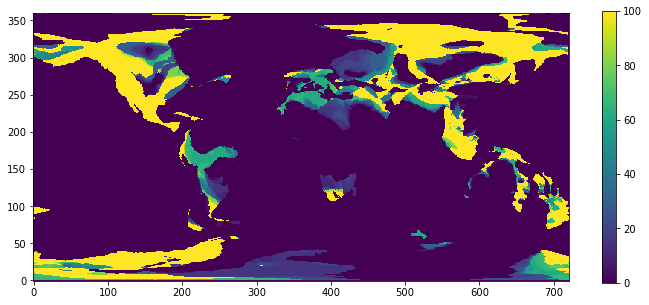

370


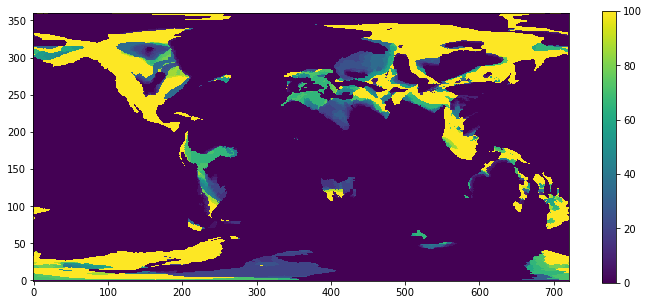

365.6


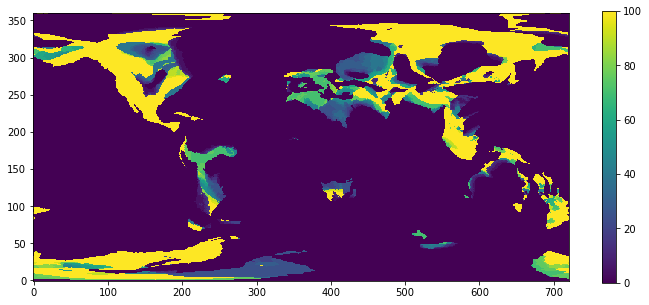

358.9


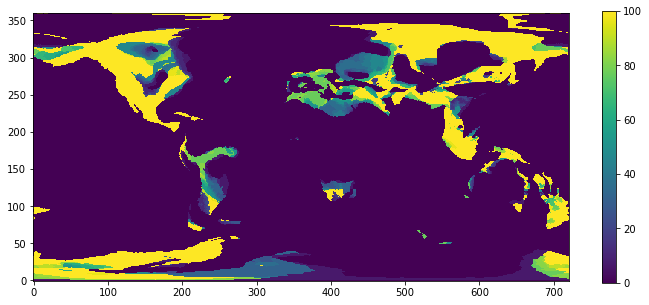

354


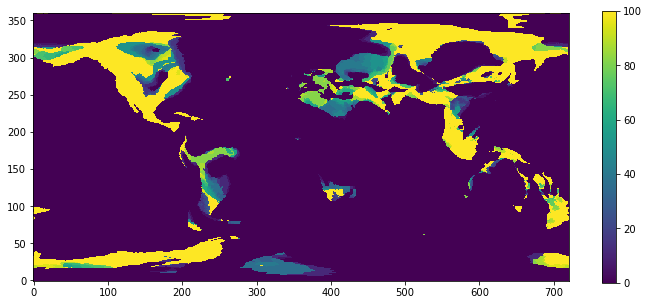

349


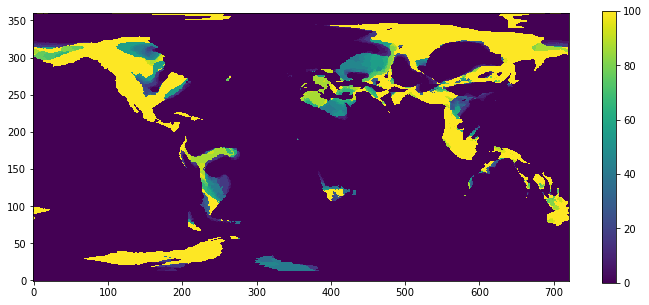

344


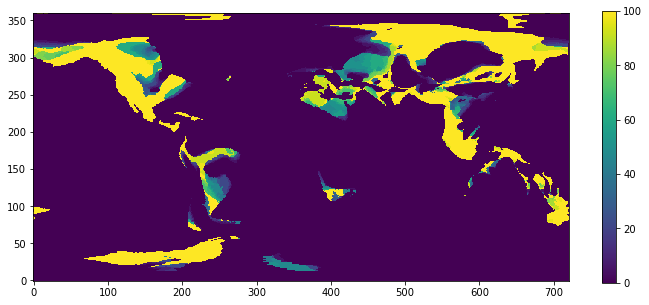

338.8


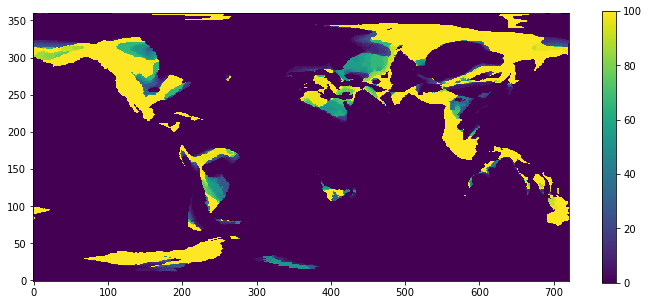

333


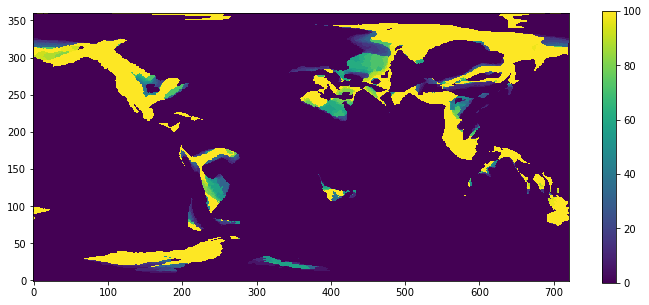

330.9


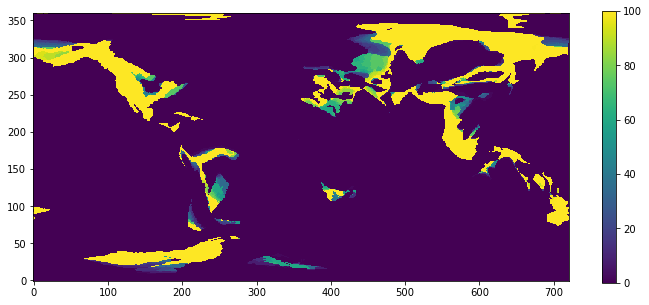

327


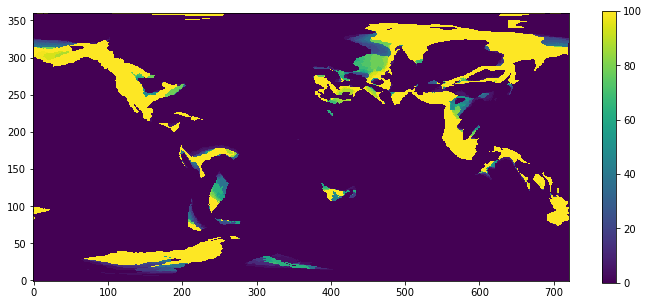

319.2


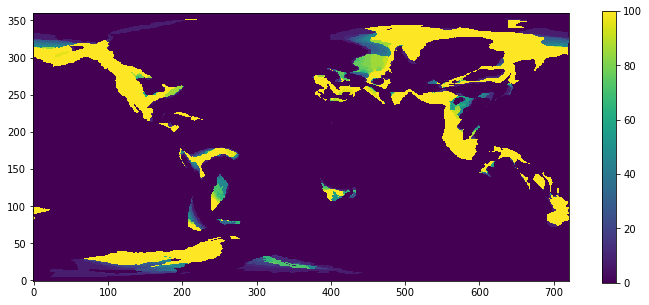

314.6


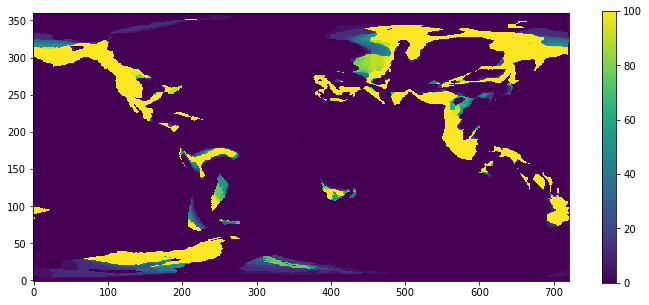

311.1


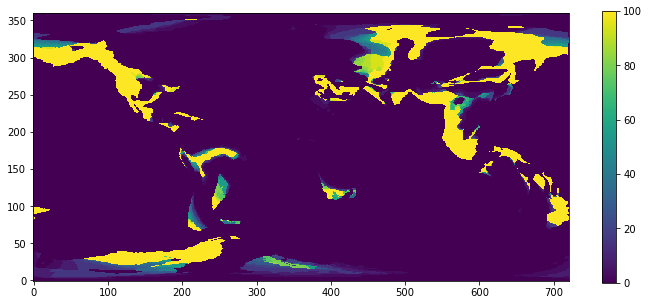

305.4


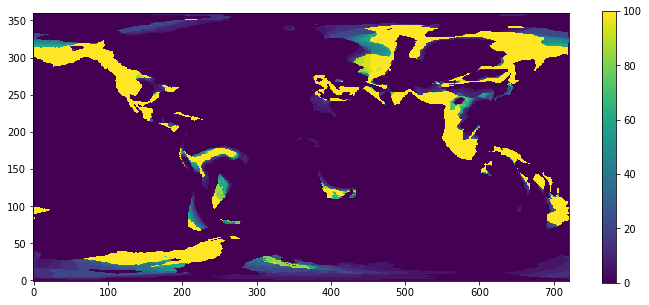

301.3


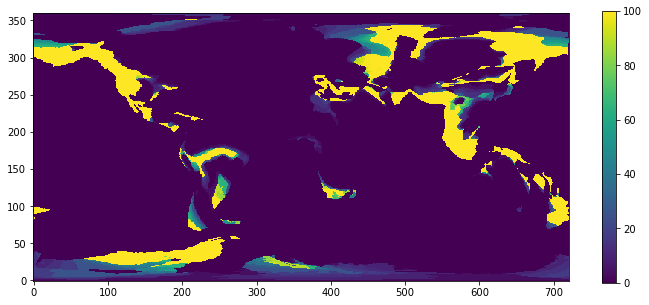

297


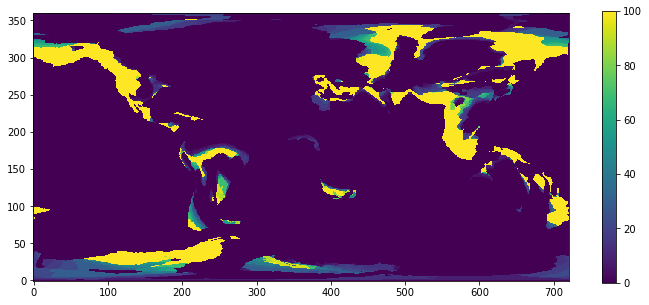

292.6


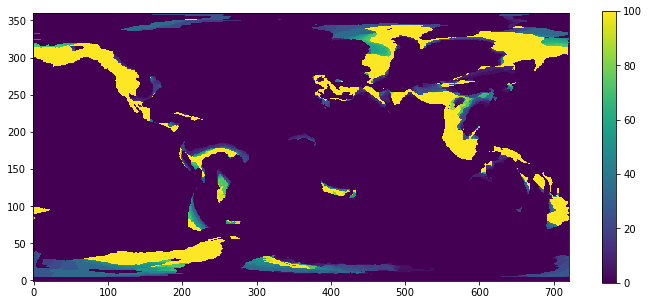

286.8


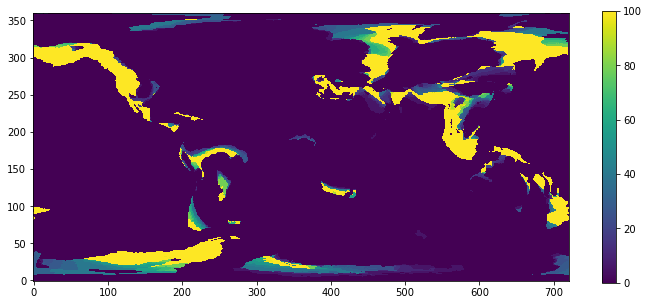

280


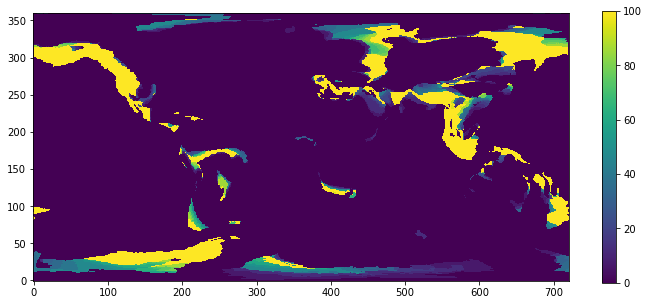

275


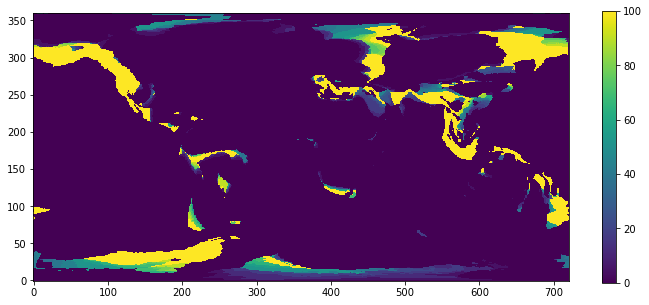

268.7


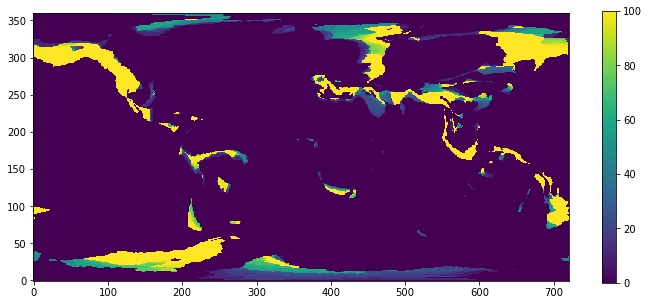

265.1


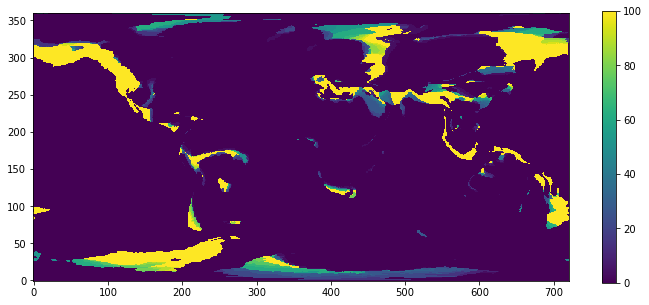

262.5


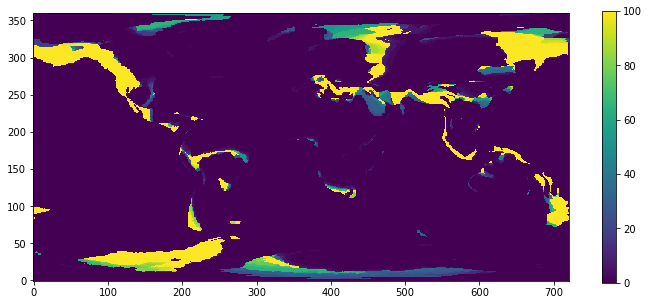

256


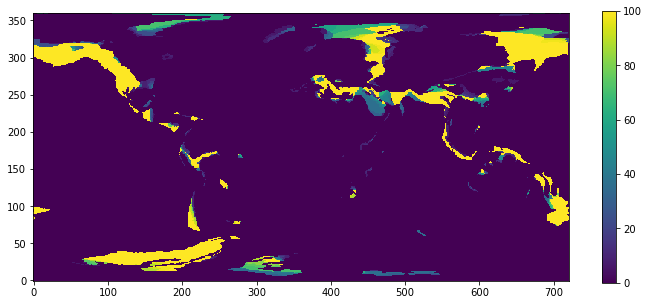

252


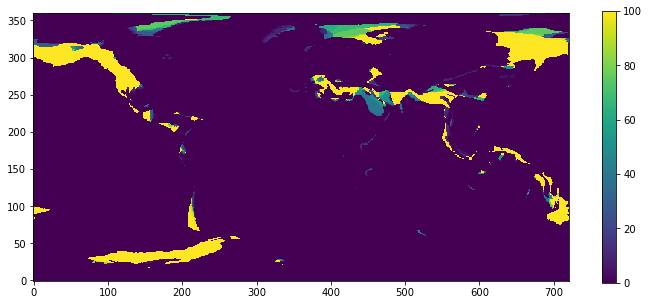

244.6


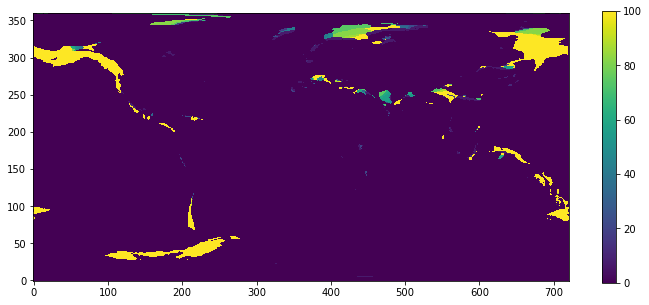

239.5


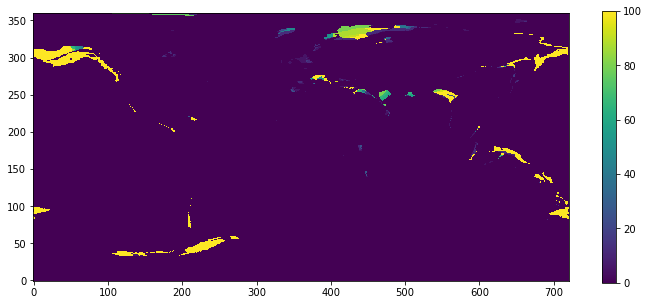

233.6


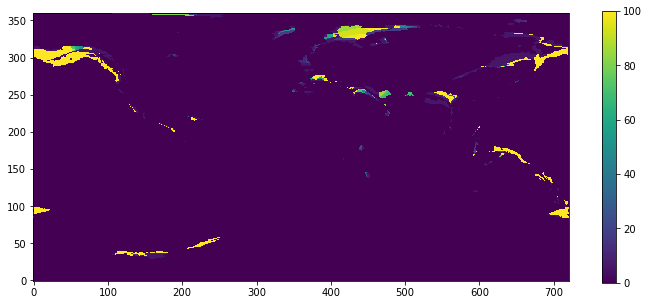

232


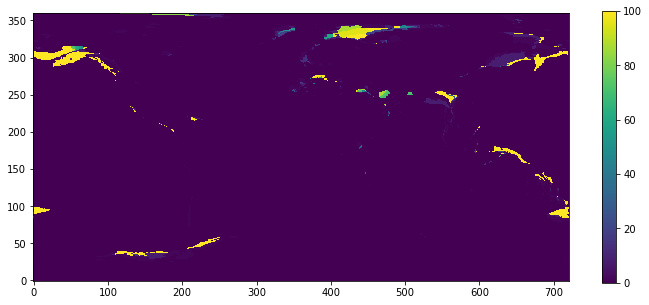

227


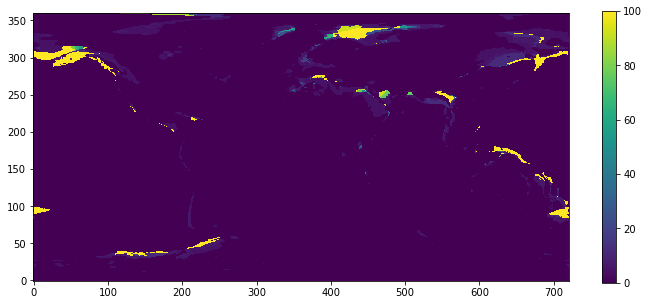

222.4


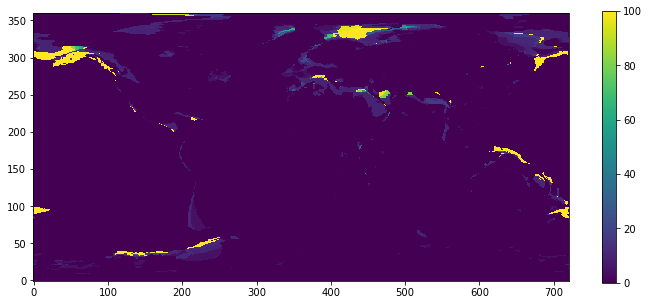

217.8


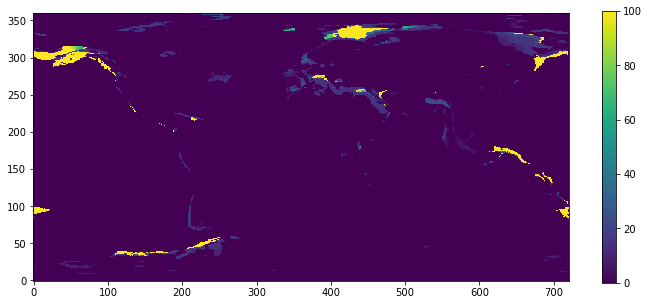

213.2


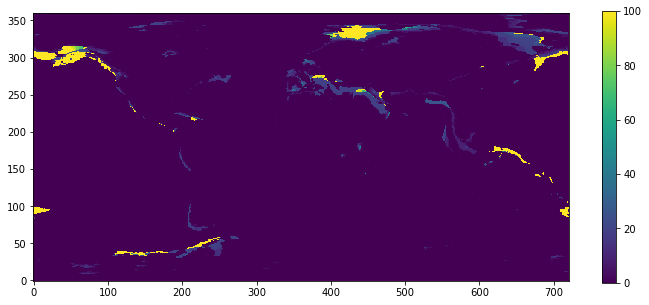

204.9


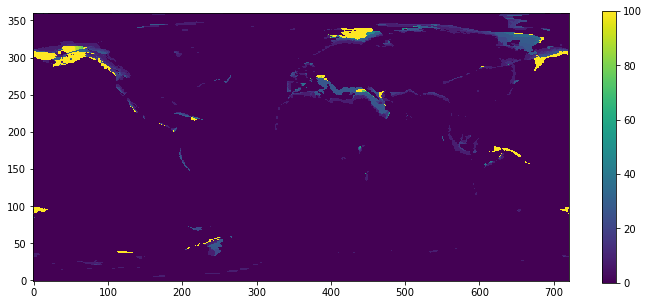

201.3


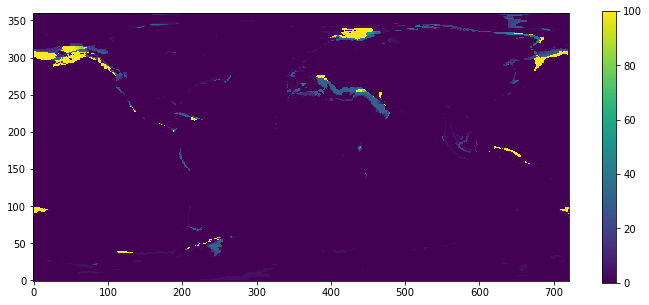

196


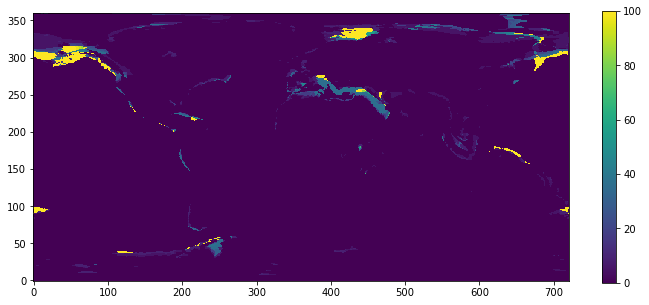

190.8


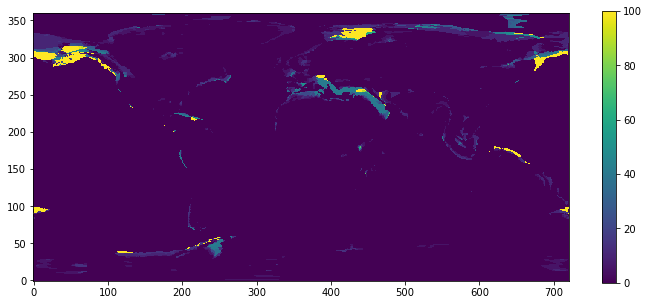

186.8


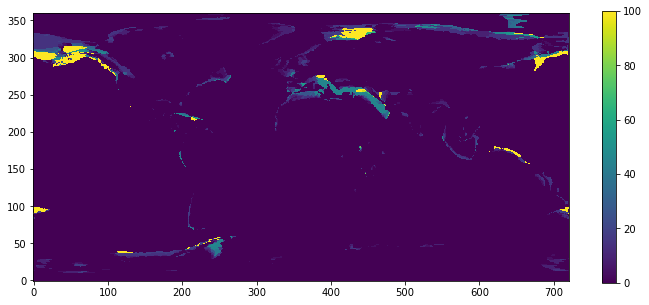

178.4


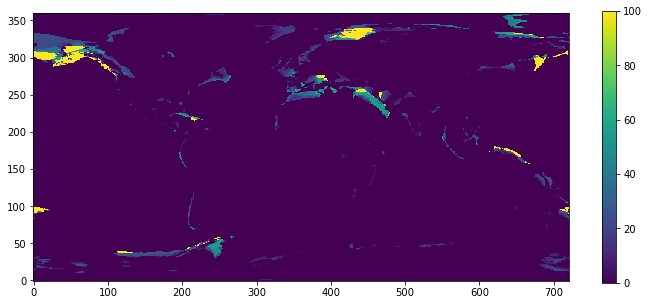

172.2


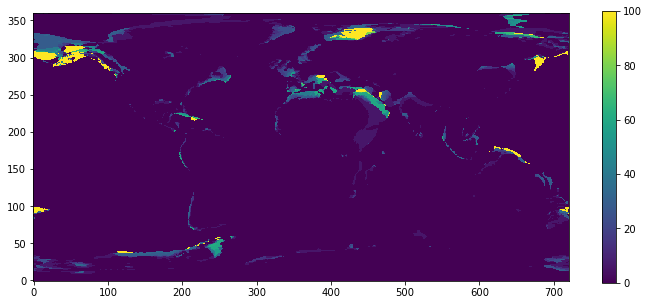

168.2


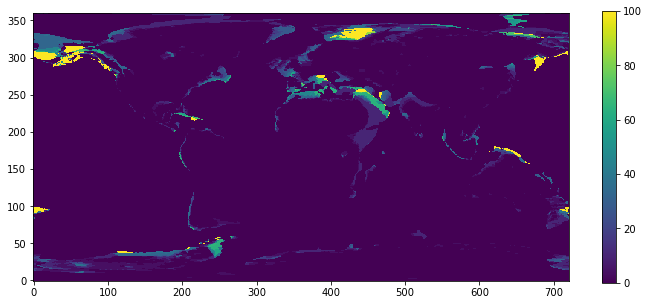

164.8


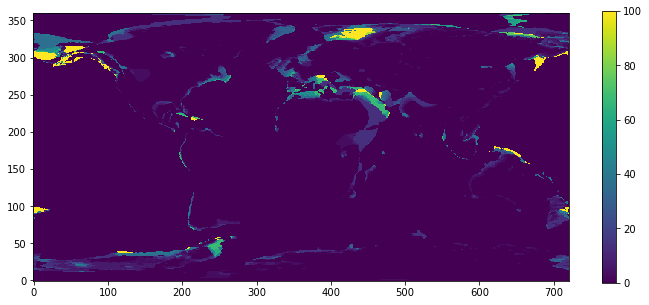

160.4


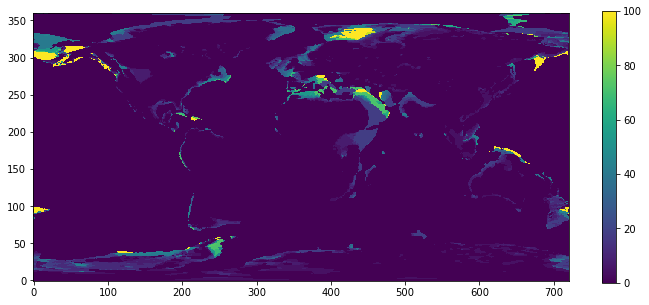

154.7


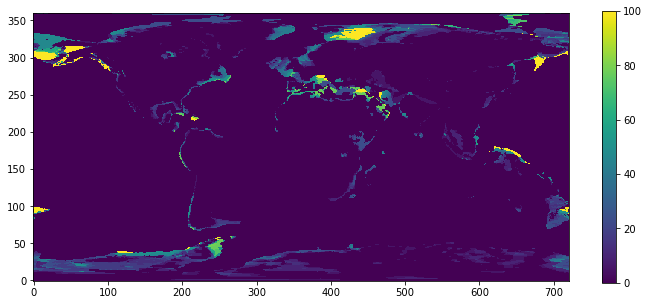

148.6


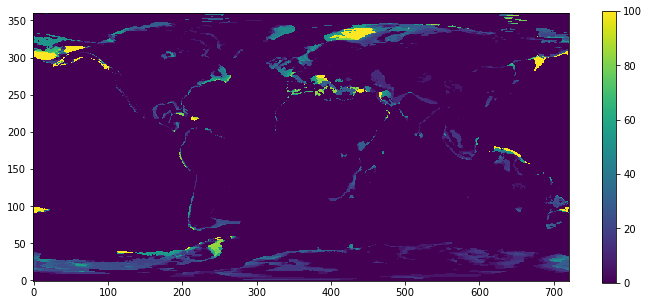

145


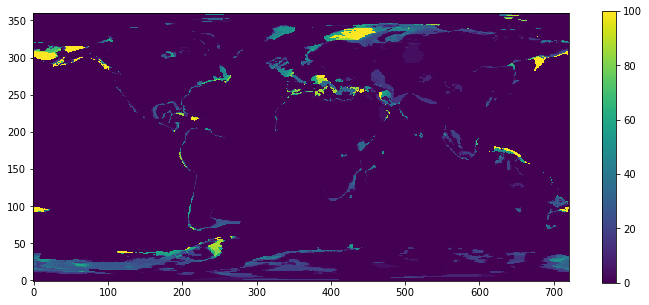

142.4


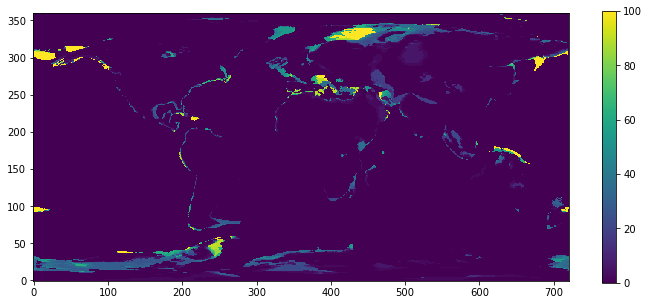

136.4


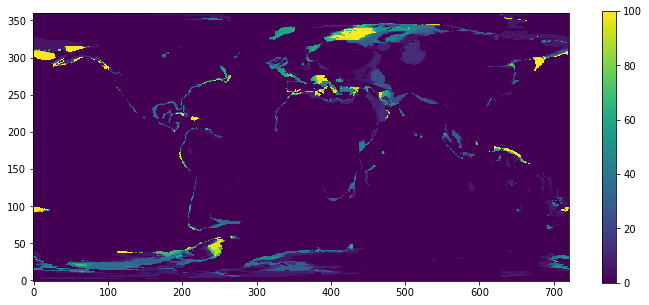

131.2


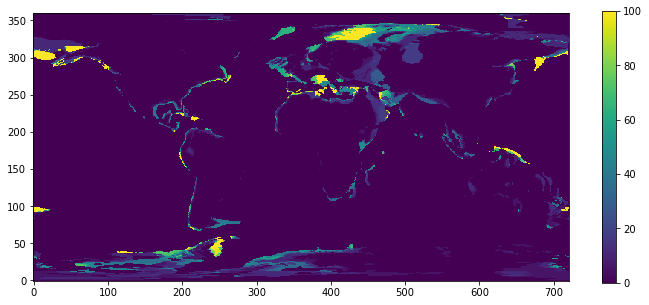

127.2


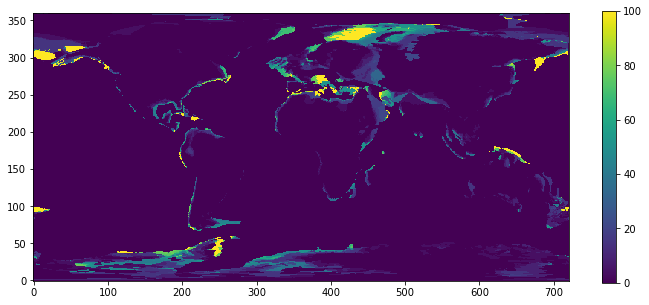

121.8


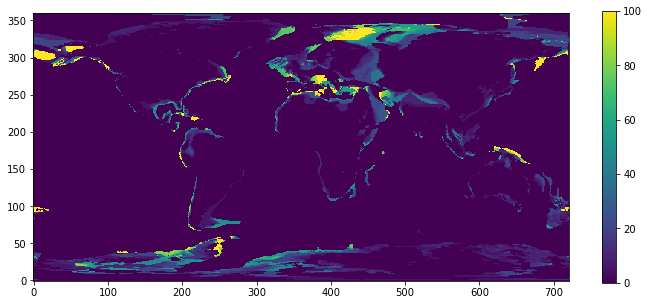

115.8


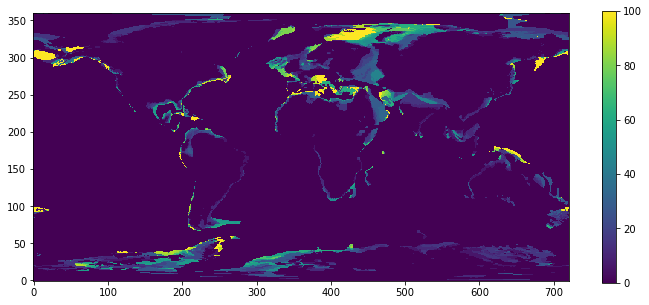

111


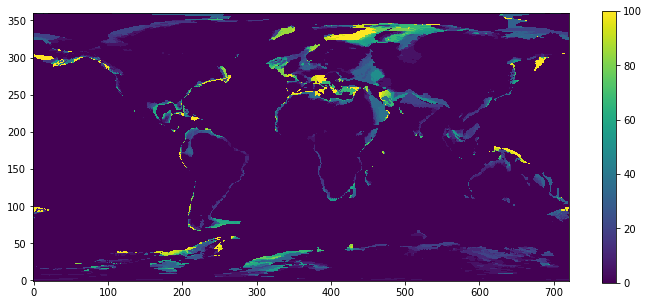

107


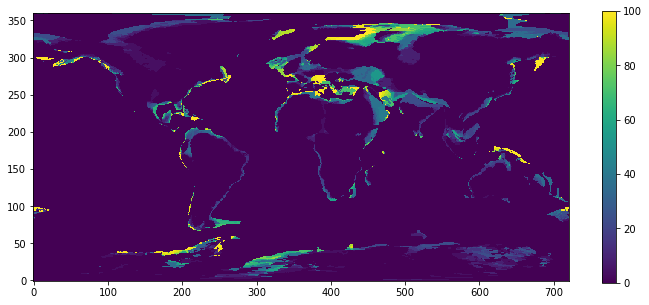

102.6


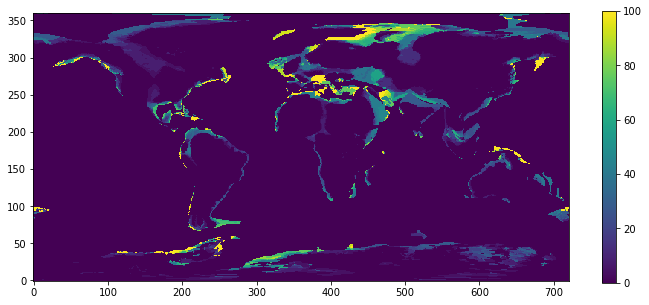

97.2


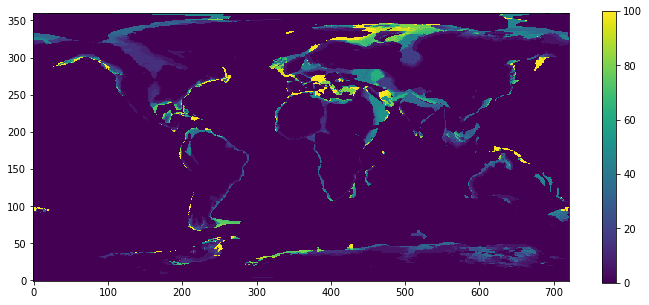

91.9


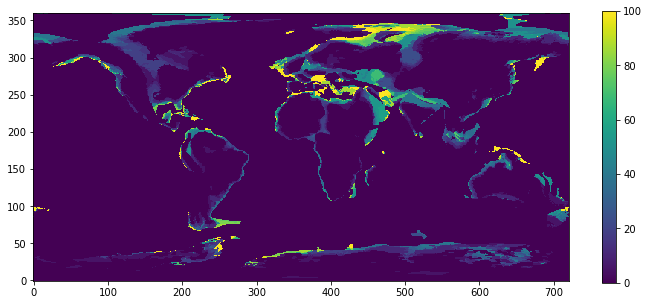

86.7


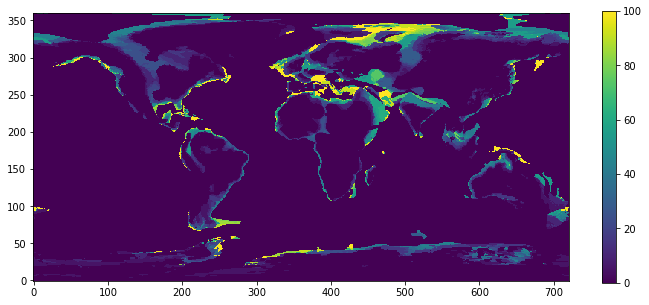

80.8


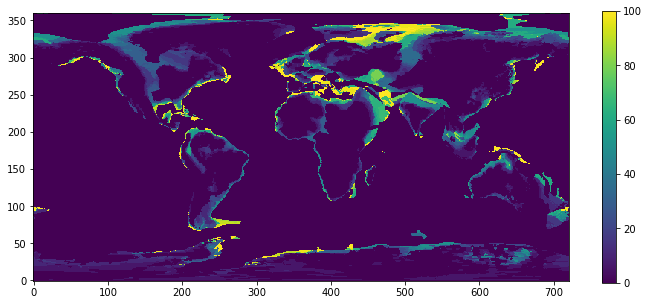

75


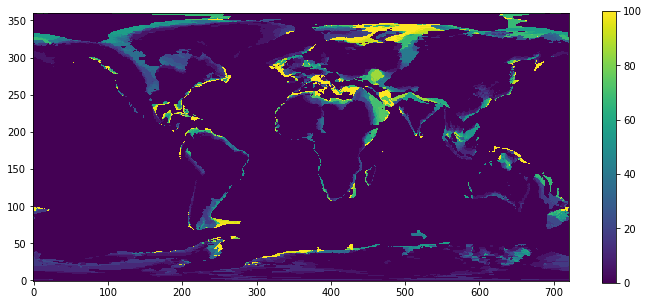

69


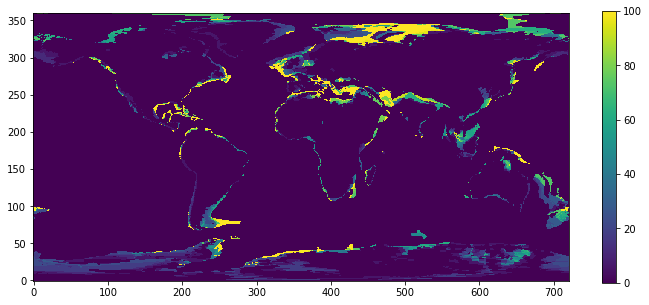

66


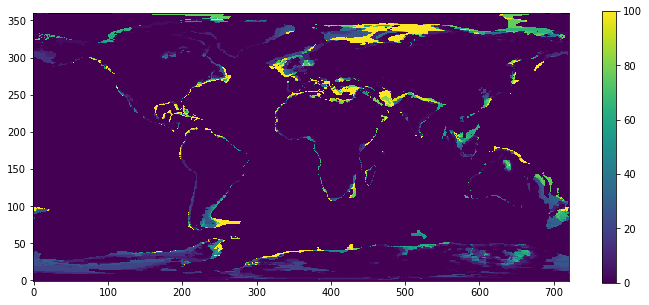

60.6


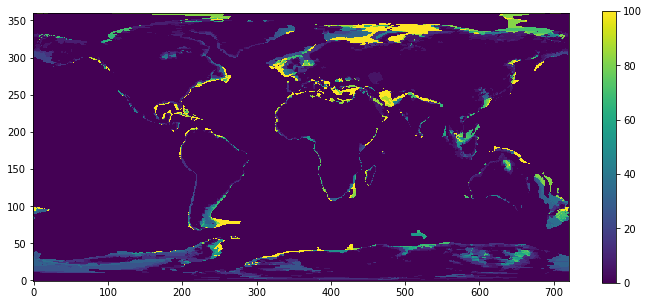

55.8


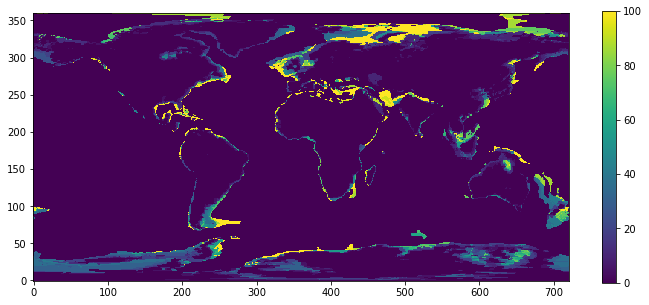

52.2


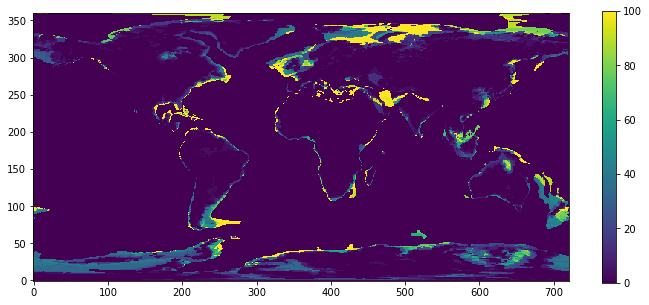

44.5


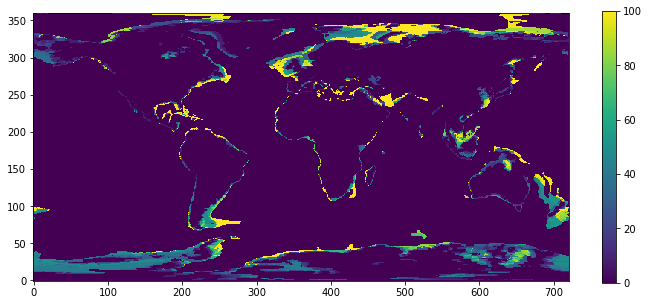

39.5


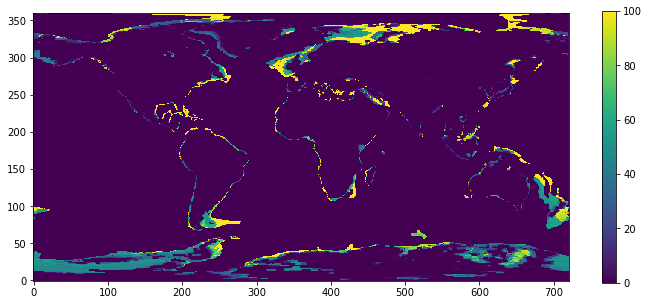

35.9


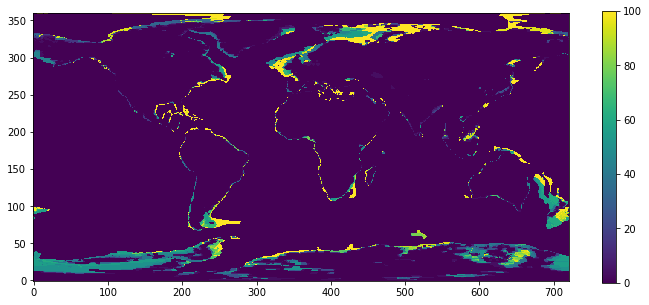

31


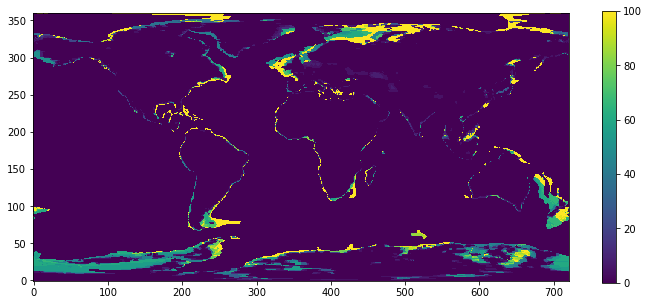

25.6


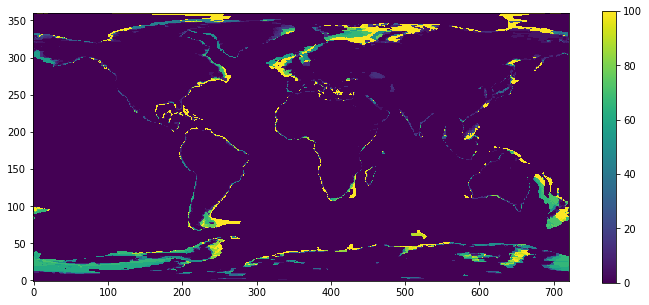

19.5


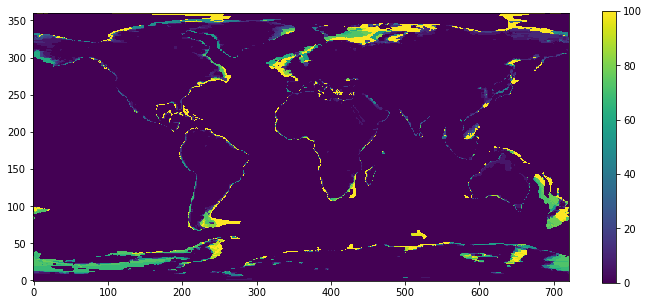

14.9


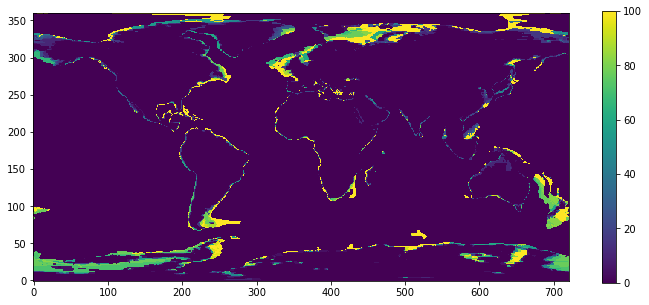

10.5


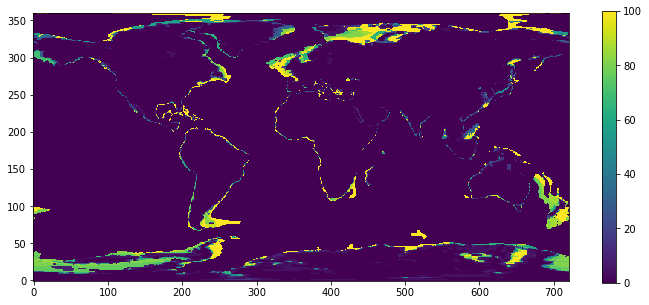

4.0


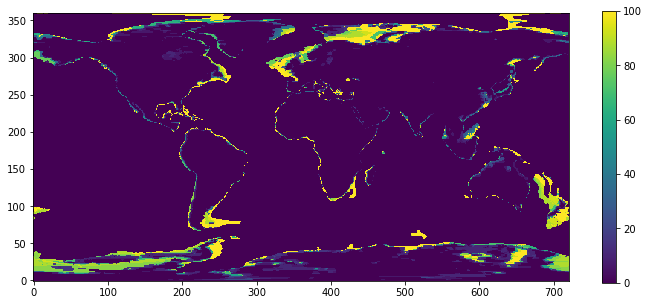

0.0


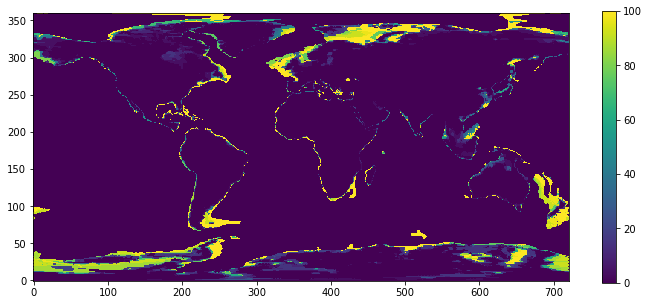

In [50]:
file_template = './grids/UnreconstructedPaleoDEM_%sMa.nc'
file_list = glob.glob('./grids/UnreconstructedPaleoDEM_*Ma.nc')

time_list = []
for file_name in file_list:
    time_list.append(file_name.split('_')[-1][:-5])
    
    
reconstruction_times = [np.float(reconstruction_time) for reconstruction_time in time_list]
ind = np.argsort(reconstruction_times)[::-1]
print ind
time_list = [time_list[indx] for indx in ind]

time_increments = np.abs(np.diff(np.array(reconstruction_times)[ind]))

ptopo = GplatesRaster(file_list[0])
age_bsl = np.zeros(ptopo.gridZ.shape)

for reconstruction_time,time_increment in zip(time_list[1:],time_increments):
    
    print reconstruction_time
    
    ptopo = GplatesRaster(file_template % reconstruction_time)

    bsl = ptopo.gridZ<0
    
    age_bsl[bsl] = age_bsl[bsl] + time_increment
    
    age_bsl[~bsl] = 0.
    
    plt.figure(figsize=(12,5))
    plt.imshow(age_bsl,origin='lower',vmin=0,vmax=100)
    plt.colorbar()
    plt.show()
    
    #from_time = np.float(reconstruction_time)
    #to_time = 0.
    
